In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
sales = pd.read_csv(r"C:\Users\abira\OneDrive\Desktop\Data Science 360\Python Projects\Python Foundation Case Study 4 - Python Visualization Case Study\Case Study 4 - Python Visualizations Case Study\SalesData.csv")
sales

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.00,1.0,0.0,1.06,1.14
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.00,1.0,0.0,0.96,1.11
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.00,2.0,0.0,1.11,1.55
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.00,1.0,0.0,1.31,1.48


In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3709 entries, 0 to 3708
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AccountId           3709 non-null   int64  
 1   AccountName         3709 non-null   object 
 2   Region              3709 non-null   object 
 3   Division            3709 non-null   object 
 4   City                3709 non-null   object 
 5   State               3709 non-null   object 
 6   Tier                3709 non-null   object 
 7   Month               3709 non-null   object 
 8   Sales2015           3709 non-null   float64
 9   Sales2016           3709 non-null   float64
 10  Units2015           3709 non-null   float64
 11  Units2016           3709 non-null   float64
 12  TargetAchevied2015  3709 non-null   float64
 13  TargetAchevied2016  3709 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 405.8+ KB


In [8]:
## 1. Compare Sales by region for 2016 with 2015 using bar chart

t1 = sales.groupby('Region')[['Sales2015', 'Sales2016']].sum()
t1

,Sales2015,Sales2016
Region,,
Central,7.891729e+06,9.787809e+06
East,9.512916e+06,1.266723e+07
West,5.349745e+06,7.209689e+06


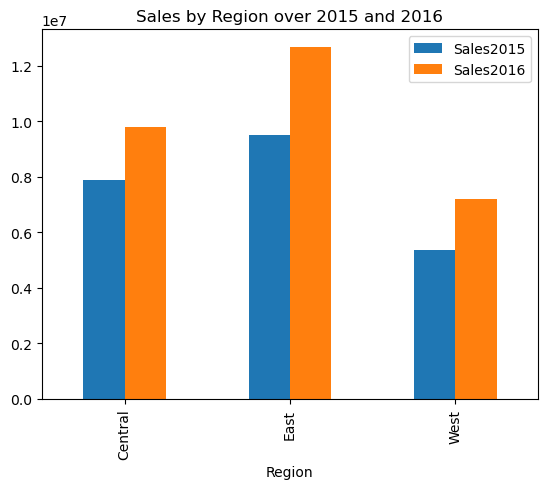

In [10]:
t1.plot(kind = 'bar')
plt.title("Sales by Region over 2015 and 2016")
plt.show()

In [15]:
## 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

t2 = sales.groupby(['Region'])['Sales2016'].sum()
t2

Region
Central    9.787809e+06
East       1.266723e+07
West       7.209689e+06
Name: Sales2016, dtype: float64

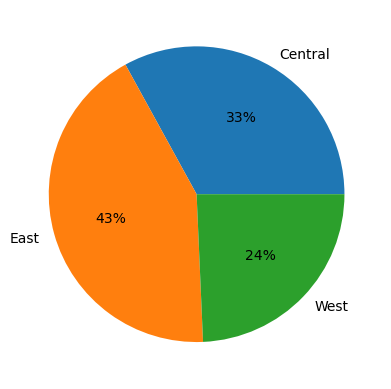

In [16]:
plt.pie(t2, labels=t2.index, autopct='%.0f%%')
plt.show()

C:\Users\abira\AppData\Local\Temp\ipykernel_22532\3018662614.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  t3graph.set_yticklabels(y)


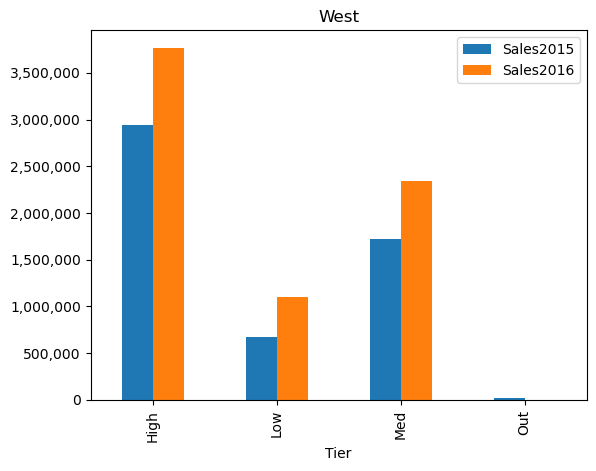

C:\Users\abira\AppData\Local\Temp\ipykernel_22532\3018662614.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  t3graph.set_yticklabels(y)


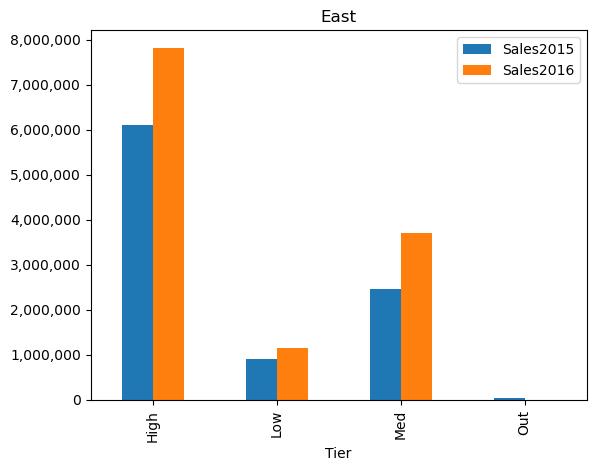

C:\Users\abira\AppData\Local\Temp\ipykernel_22532\3018662614.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  t3graph.set_yticklabels(y)


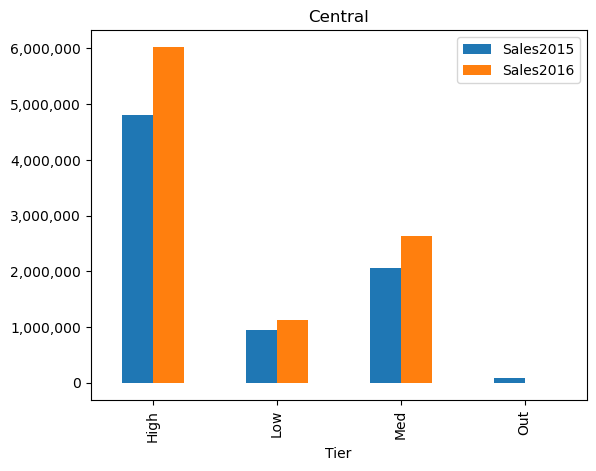

In [101]:
## 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

region = sales.Region.unique()
t3 = sales.groupby(['Region','Tier'])[['Sales2015','Sales2016']].sum().reset_index()

for i in range(3):
    t3graph=t3[t3.Region==region[i]].drop(columns="Region").set_index("Tier").plot.bar()
    y=['{:,.0f}'.format(x) for x in t3graph.get_yticks()]
    t3graph.set_yticklabels(y)
    t3graph.set_title(region[i])
    plt.show()

In [100]:
t3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, Central High to West Out
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Region     12 non-null     object 
 1   Tier       12 non-null     object 
 2   Sales2015  12 non-null     float64
 3   Sales2016  12 non-null     float64
dtypes: float64(2), object(2)
memory usage: 780.0+ bytes


C:\Users\abira\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


TypeError: Neither the `x` nor `y` variable appears to be numeric.

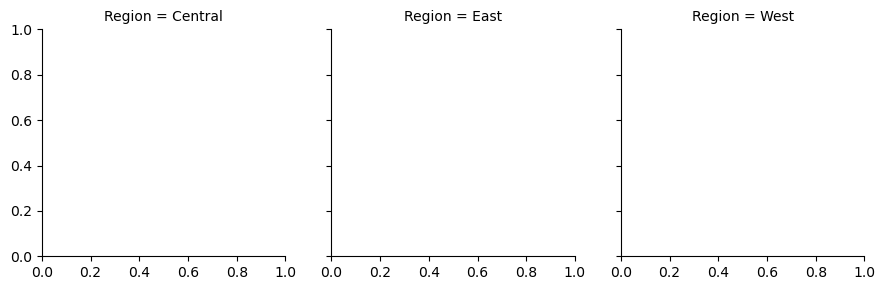

In [99]:
for i in range(3):
    sales3graph=sales3[sales3.Region==region[i]].drop(columns="Region").set_index("Tier").plot.bar()
    y=['{:,.0f}'.format(x) for x in sales3graph.get_yticks()]
    sales3graph.set_yticklabels(y)
    sales3graph.set_title(region[i])
    plt.show()

<Figure size 2000x500 with 0 Axes>

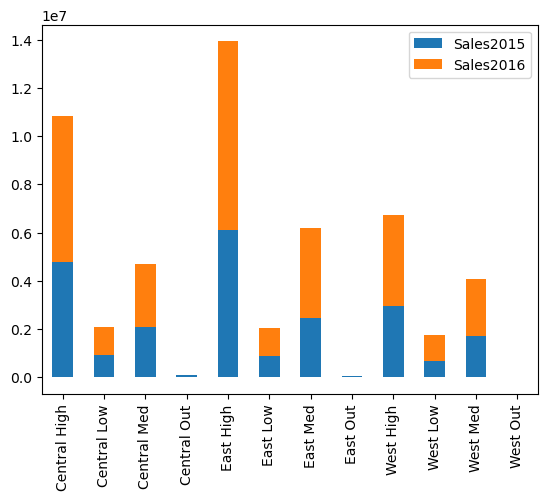

In [45]:
plt.figure(figsize = (20,5))
t3.plot(kind = 'bar', stacked = True, use_index = True)
plt.show()

In [91]:
## 4. In East region, which state registered a decline in 2016 as compared to 2015?

t4 = sales.loc[sales.Region == 'East'].groupby('State')[['Sales2015', 'Sales2016']].sum()
t4

,Sales2015,Sales2016
State,,
CT,197202.790,323502.31
DC,216723.950,257421.69
FL,1660162.000,2508232.28
GA,681546.460,946919.77
MA,419278.750,687096.45
MD,527309.060,750008.79
ME,77425.640,183673.05
NC,1292801.640,1610521.00
NH,136419.380,144717.51


In [53]:
t4[t4.Sales2015 > t4.Sales2016]

,State,Sales2015,Sales2016
10,NY,1725415.065,1703135.8


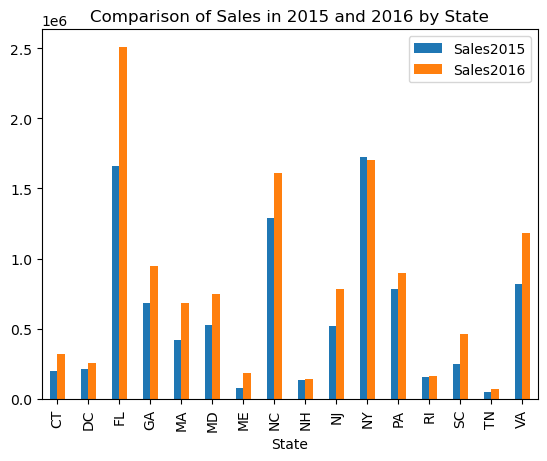

In [93]:
t4.plot(kind = 'bar', use_index = True)
plt.title('Comparison of Sales in 2015 and 2016 by State')
plt.show()

In [89]:
## 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

t5 = sales.loc[sales.Tier == 'High'].groupby('Division')[['Units2015', 'Units2016']].sum()
t5

,Units2015,Units2016
Division,,
BIG APPLE,180.8330,231.0000
CHARGERS,123.6666,164.4999
CONGRESSIONAL,164.5003,205.0000
DIAMONDBACK,153.3334,176.6667
EMPIRE,414.3332,449.3332
GRIDIRON,213.6673,246.1675
GULF STREAM,185.0000,301.0009
HAILSTORM,187.8338,247.0003
KINETIC,214.3334,244.5001


In [59]:
t5[t5.Units2015 > t5.Units2016]

,Division,Units2015,Units2016


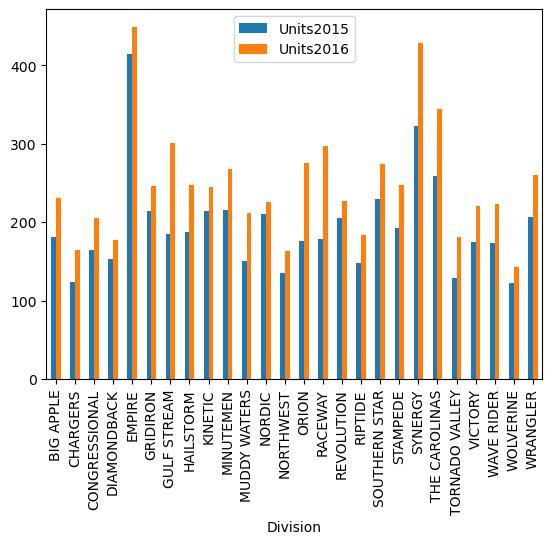

In [90]:
t5.plot(kind = 'bar', use_index = True)
plt.show()

In [ ]:
#### 6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. The Quarters are based on months and defined as -
• Jan - Mar : Q1
• Apr - Jun : Q2
• Jul - Sep : Q3
• Oct - Dec : Q4

In [61]:
sales.sample(5)

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
2634,9722,Account1792,Central,MUDDY WATERS,LAFAYETTE,LA,Low,Jun,0.00,2209.00,0.0,1.0,1.32,1.07
3356,80622,Account2386,West,DIAMONDBACK,LAS VEGAS S,NV,Low,Aug,0.00,4418.00,0.0,2.0,1.00,1.36
596,3230,Account363,Central,WOLVERINE,DETROIT S,MI,Med,Oct,0.00,5457.54,0.0,2.0,1.40,1.04
2653,9773,Account1806,Central,STAMPEDE,OKLAHOMA CITY E,OK,Low,Jan,10400.38,0.00,5.0,0.0,1.24,1.51
2229,7382,Account1464,East,MINUTEMEN,PORTLAND,ME,Med,Sep,5912.32,2956.16,2.0,1.0,0.80,1.46


In [63]:
sales['Quarter'] = np.where(sales.Month.isin(['Jan', 'Feb', 'Mar']), 'Q1', 
                    np.where(sales.Month.isin(['Apr', 'May', 'Jun']), 'Q2', 
                    np.where(sales.Month.isin(['Jul', 'Aug', 'Sep']), 'Q3', 'Q4')))

sales.sample()
                             

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Quarter
3526,1021697,Account2554,Central,WRANGLER,HOUSTON W,TX,High,Oct,0.0,3003.17,0.0,1.0,1.25,1.16,Q4


In [72]:
## 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot

t6 = sales.groupby('Quarter')[['Sales2015', 'Sales2016']].sum()
t6

,Sales2015,Sales2016
Quarter,,
Q1,5.485800e+06,6.997953e+06
Q2,5.390862e+06,7.237361e+06
Q3,6.164094e+06,7.861546e+06
Q4,5.713634e+06,7.567868e+06


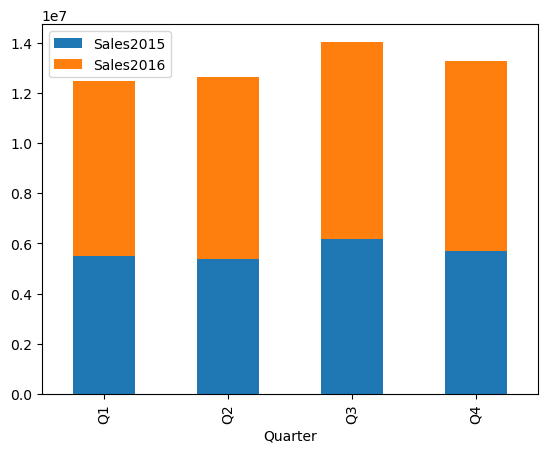

In [73]:
t6.plot(kind = 'bar', stacked = True, use_index = True)
plt.show()

In [82]:
## 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.

t7 = sales.groupby('Tier')['Sales2016'].sum()
t7.drop('Out', axis = 0, inplace = True)
t7

Tier
High    1.761123e+07
Low     3.377265e+06
Med     8.679480e+06
Name: Sales2016, dtype: float64

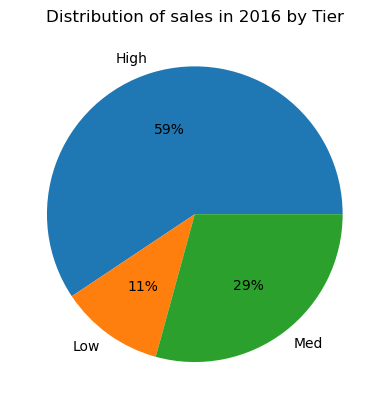

In [86]:
plt.pie(t7, labels=t7.index, autopct='%.0f%%')
plt.title("Distribution of sales in 2016 by Tier")
plt.show()